In [ ]:
# prompt: git clone
!git clone https://github.com/zclawr/rpg-sentiment-analysis.git

Cloning into 'rpg-sentiment-analysis'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
Receiving objects: 100% (205/205), 7.86 MiB | 134.00 KiB/s, done.
remote: Total 205 (delta 19), reused 5 (delta 5), pack-reused 171 (from 1)
Resolving deltas: 100% (92/92), done.


# Data Exploration

In [1]:
!cd ./rpg-sentiment-analysis/
!ls

/bin/bash: line 1: cd: ./rpg-sentiment-analysis/: No such file or directory
sample_data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./rpg-sentiment-analysis/manual_labels.csv')
df.head()

#Need the following:
# num observations
# details about data distributions
# scales
# missing data
# column descriptions
# Explain preprocessing in README

df_emotions = df.drop(columns=['Line', 'Movie', 'Character', 'Dialogue'])
df_emotions.head()
categories = list(df_emotions.columns.values)

sns.set(font_scale = 1)
plt.figure(figsize=(15,8))

df_emotions['Joy'] = pd.to_numeric(df_emotions['Joy'], errors='coerce')
df_emotions['Sadness'] = pd.to_numeric(df_emotions['Sadness'], errors='coerce')
df_emotions['Disgust'] = pd.to_numeric(df_emotions['Disgust'], errors='coerce')
df_emotions['Fear'] = pd.to_numeric(df_emotions['Fear'], errors='coerce')
df_emotions['Anger'] = pd.to_numeric(df_emotions['Anger'], errors='coerce')
df_emotions['Surprise'] = pd.to_numeric(df_emotions['Surprise'], errors='coerce')
df_emotions['Calmness'] = pd.to_numeric(df_emotions['Calmness'], errors='coerce')
df_emotions['Confusion'] = pd.to_numeric(df_emotions['Confusion'], errors='coerce')
df_emotions['Anxiety'] = pd.to_numeric(df_emotions['Anxiety'], errors='coerce')
df_emotions['Lust'] = pd.to_numeric(df_emotions['Lust'], errors='coerce')

axes = sns.barplot(x=categories, y=df_emotions.sum().values)

plt.title("Sum of Emotion Ratings for Dialogue", fontsize=24)
plt.ylabel('Emotion Rating Sum', fontsize=18)
plt.xlabel('Emotion Category ', fontsize=18)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './rpg-sentiment-analysis/manual_labels.csv'

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))
# clean
subset = df_emotions
stopwords = ['Luke', 'Solo', 'Jabba', 'Yoda', 'Han', 'Wookiee', 'Skywalker', 'Chewie', 'Dagobah', 'Hutt', 'Artoo', 'Threepio', 'Vader', 'Lando', 'Leia', 'Jedi', 'Ben', 'Rouge', 'droid', 'Dack'] + list(STOPWORDS)
text = df['Dialogue'].values
cloud_toxic = WordCloud(
                          stopwords=stopwords,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./rpg-sentiment-analysis/combined_labels.csv')
df_emotions = df.drop(columns=['Line', 'Movie', 'Character', 'Dialogue'])
df_emotions = df_emotions.dropna()

for col in df_emotions.columns:
    df_emotions[col] = pd.to_numeric(df_emotions[col], errors='coerce')
num_emotions = len(list(df_emotions.columns))

angles = np.linspace(0, 2 * np.pi, num_emotions, endpoint=False).tolist()
plt.figure(figsize=(10, 10), dpi=100)
ax = plt.subplot(111, polar=True)

for i in range(len(df)):
    values = df_emotions.iloc[i].values.tolist()
    values += values[:1]
    angle_values = angles + angles[:1]
    ax.plot(angle_values, values, marker='o', linestyle='-', markersize=5, alpha=0.7, label=f'Observation {i+1}')

# showing the emotions around the circle
angles += angles[:1]
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')
ax.set_ylim(0, 10)

plt.title("Emotion Intensities", size=16, pad=20)
plt.show()

# Data Preprocessing

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# apply TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Dialogue'][1:]).toarray()
y = df[['Joy', 'Sadness', 'Disgust', 'Fear', 'Anger', 'Surprise', 'Calmness', 'Confusion', 'Anxiety', 'Lust']].iloc[1:]
y = y.apply(pd.to_numeric, errors='coerce').dropna()

# ensure the shapes are the same
if X.shape[0] > y.shape[0]:
    X = X[:y.shape[0], :]
elif y.shape[0] > X.shape[0]:
    y = y.iloc[:X.shape[0], :]
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# min-max normalization so that output is between 0 and 1
y = (y - y.min()) / (y.max() - y.min())
display(y.describe())

Shape of X: (2478, 2731)
Shape of y: (2478, 10)


,Joy,Sadness,Disgust,Fear,Anger,Surprise,Calmness,Confusion,Anxiety,Lust
count,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000
mean,0.108555,0.116586,0.072639,0.253067,0.183454,0.200646,0.511703,0.117958,0.315093,0.012470
std,0.217464,0.212914,0.169476,0.259679,0.272892,0.259404,0.252641,0.239845,0.260210,0.095445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.100000,0.000000
50%,0.000000,0.000000,0.000000,0.200000,0.000000,0.100000,0.500000,0.000000,0.300000,0.000000
75%,0.100000,0.200000,0.000000,0.500000,0.500000,0.300000,0.600000,0.100000,0.500000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training First Model

In [ ]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fitting model
rf_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

predicted_df = pd.DataFrame(y_test_pred, columns=y.columns)

In [ ]:
# model evaluation

# Perform k-fold cross-validation (e.g., 5-fold)
from sklearn.model_selection import cross_val_score

k = 5
mse_scores = cross_val_score(rf_model, X, y, cv=k, scoring='neg_mean_squared_error')
mse_scores = -mse_scores
print(f"MSE scores for each fold: {mse_scores}")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Standard Deviation of MSE: {np.std(mse_scores)}")

# show the training mse
train_mse = mean_squared_error(y_train, y_train_pred, multioutput='raw_values')
train_mse_results = dict(zip(y.columns, train_mse))

# show the testing mse
test_mse = mean_squared_error(y_test, y_test_pred, multioutput='raw_values')
test_mse_results = dict(zip(y.columns, test_mse))

eval_df = pd.DataFrame({'Training MSE': train_mse_results, 'Testing MSE': test_mse_results}, index=y.columns)
eval_df['Which is Greater'] = eval_df.apply(lambda row: row.idxmax(), axis=1)
display(eval_df)

MSE scores for each fold: [0.12032912 0.10202786 0.08477991 0.0683645  0.09883799]
Mean MSE: 0.09486787516319949
Standard Deviation of MSE: 0.017432716497048282


,Training MSE,Testing MSE,Which is Greater
Joy,0.014913,0.063421,Testing MSE
Sadness,0.007435,0.046829,Testing MSE
Disgust,0.006578,0.034534,Testing MSE
Fear,0.012238,0.096060,Testing MSE
Anger,0.011528,0.103430,Testing MSE
Surprise,0.017985,0.120433,Testing MSE
Calmness,0.021697,0.199642,Testing MSE
Confusion,0.017411,0.140069,Testing MSE
Anxiety,0.019745,0.136708,Testing MSE
Lust,0.004706,0.024377,Testing MSE


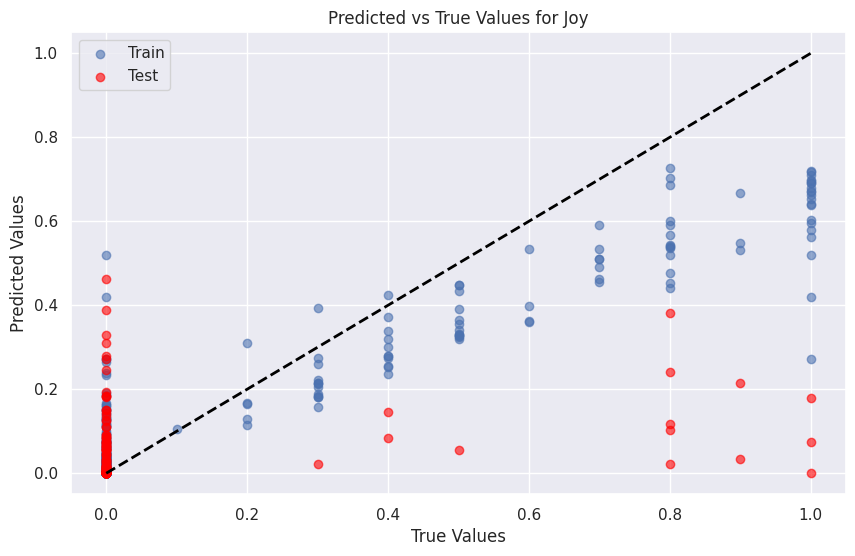

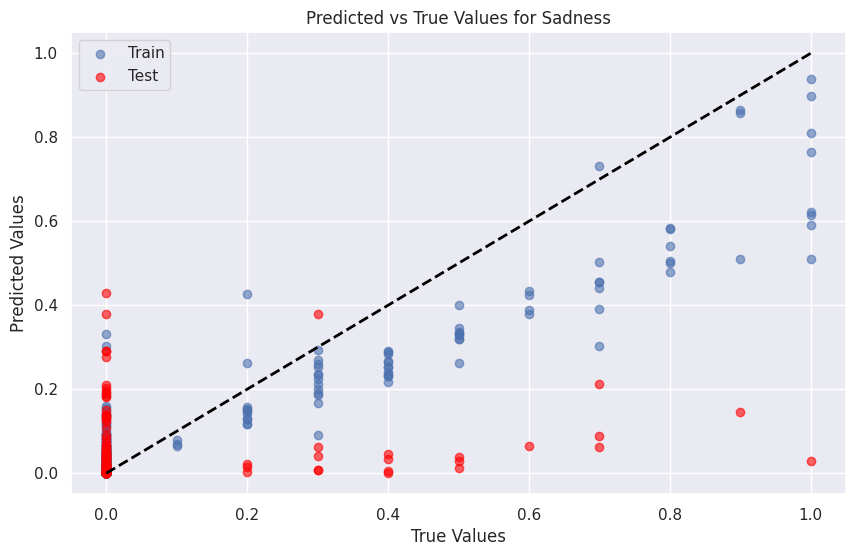

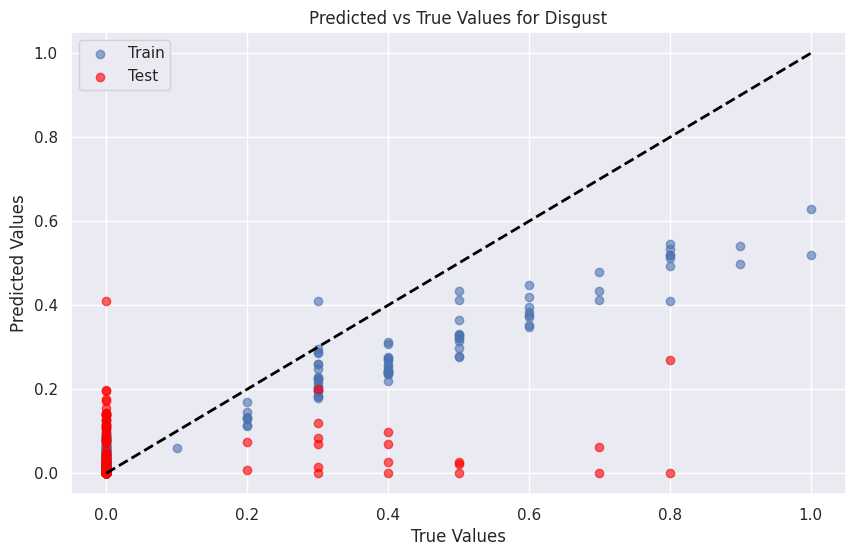

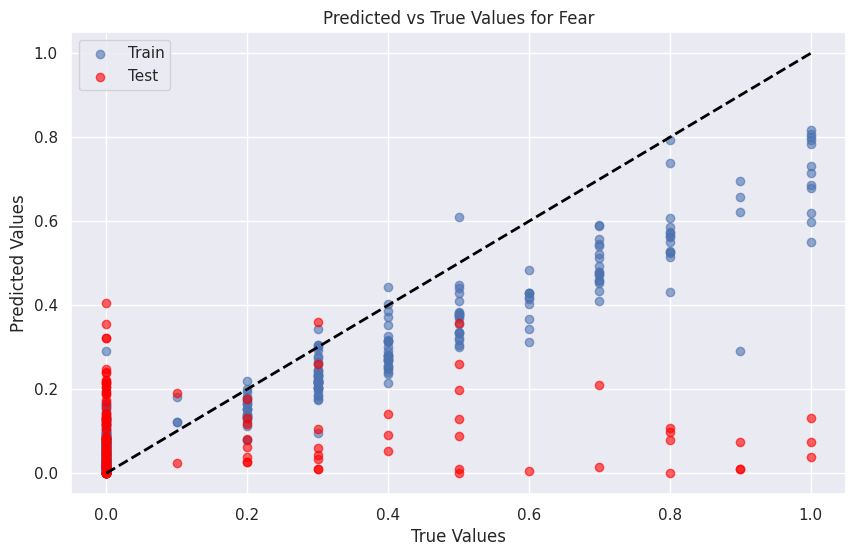

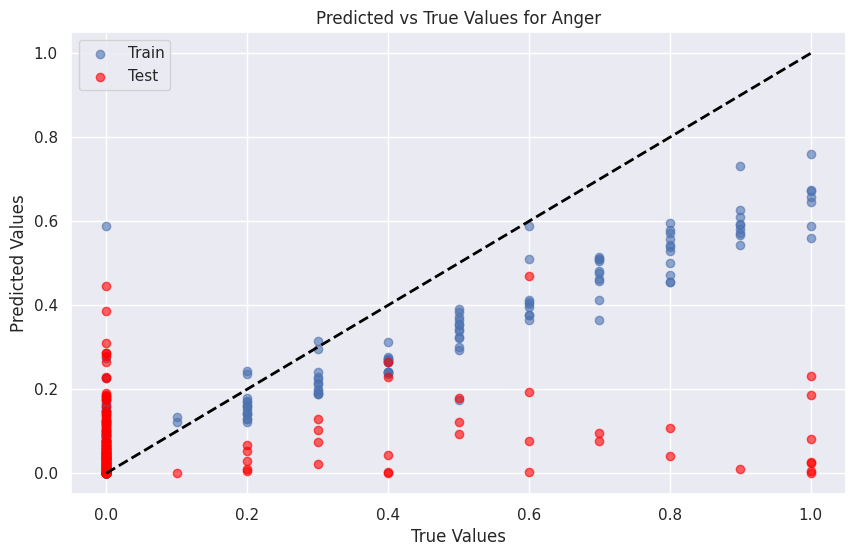

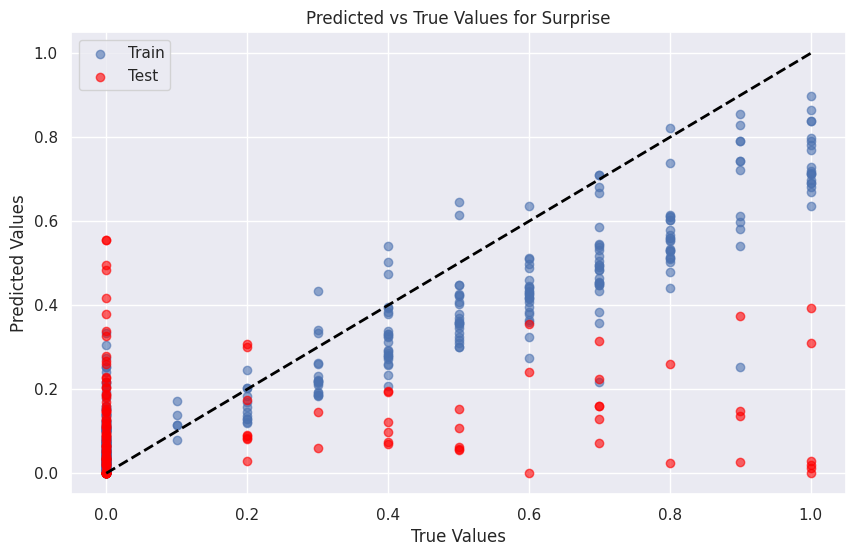

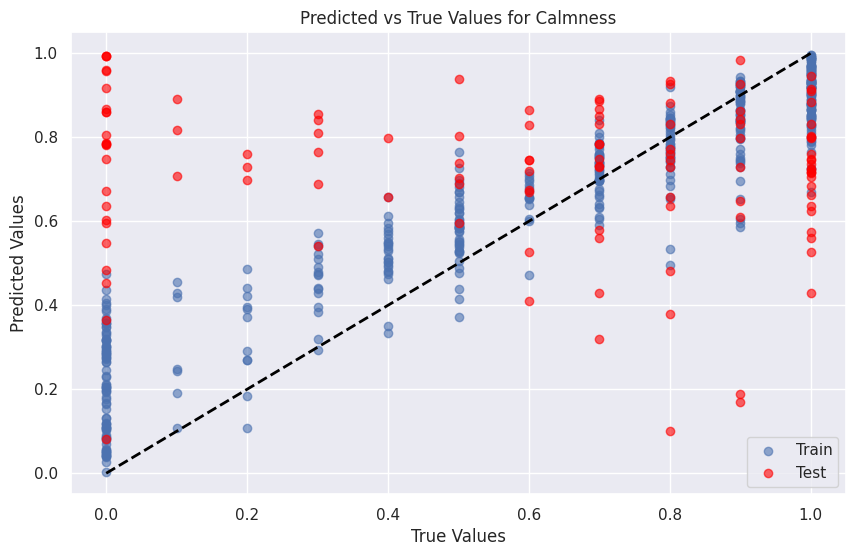

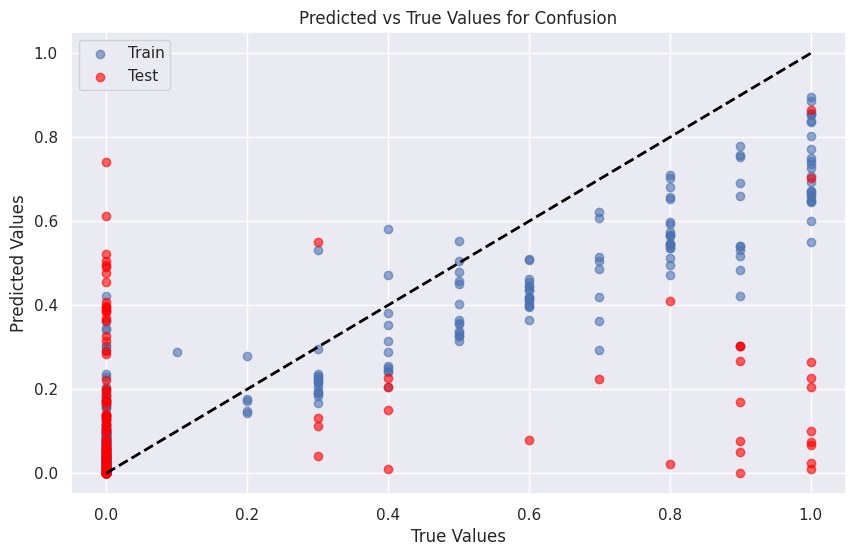

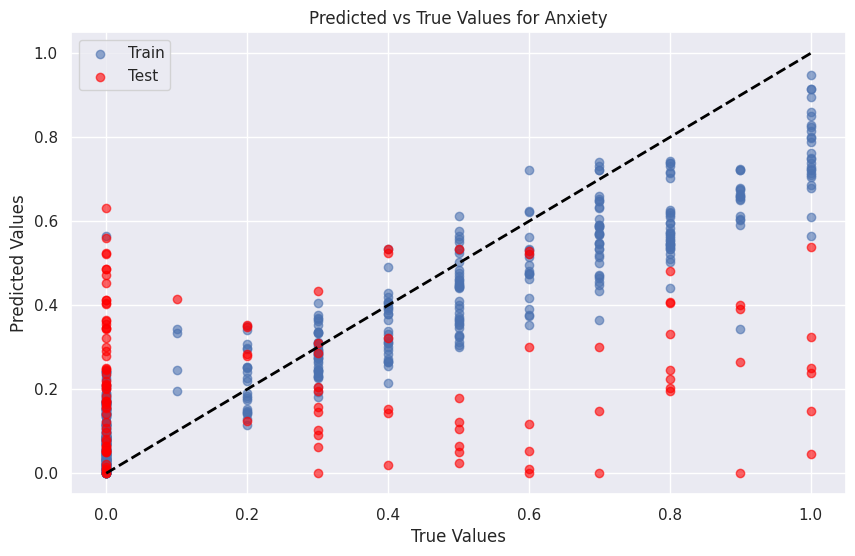

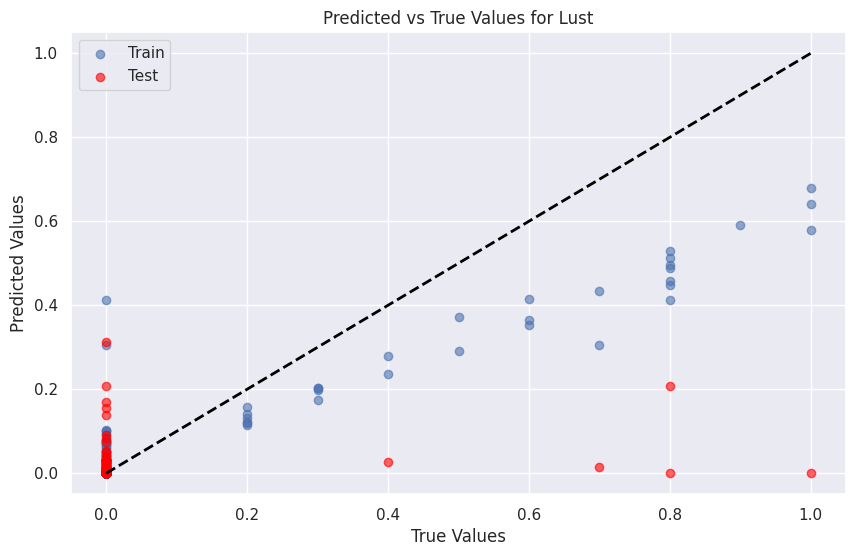

In [ ]:
import matplotlib.pyplot as plt

# Loop through each output variable
for i, column in enumerate(y_train.columns):
    plt.figure(figsize=(10, 6))

    # Train predictions
    plt.scatter(y_train[column], rf_model.predict(X_train)[:, i], label="Train", alpha=0.6)

    # Test predictions
    plt.scatter(y_test[column], rf_model.predict(X_test)[:, i], label="Test", alpha=0.6, color="red")

    # y=x line
    plt.plot([y_train[column].min(), y_train[column].max()],
             [y_train[column].min(), y_train[column].max()],
             color="black", linestyle="--", linewidth=2)

    plt.title(f"Predicted vs True Values for {column}")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.show()


In [ ]:
new_sentence = ["Oh!"]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = rf_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

print("before thresholding:")
display(predicted_df)
print()

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values
# if the value is <0, just set it equal to 0
predicted_df[predicted_df < 0] = 0

print("after thresholding:")
display(predicted_df)

before thresholding:


,Joy,Sadness,Disgust,Fear,Anger,Surprise,Calmness,Confusion,Anxiety,Lust
0,0.36,0.0,0.048,0.181,0.0,0.732,0.295,0.033,0.275,0.0



after thresholding:


,Joy,Sadness,Disgust,Fear,Anger,Surprise,Calmness,Confusion,Anxiety,Lust
0,0.235589,0.0,0.0,0.005411,0.0,0.496668,0.0,0.0,0.0,0.0


In [ ]:
'''
Oversampling can help improve model performance, especially in cases where you have imbalanced data—meaning
that certain emotion intensities or emotions (e.g., high levels of "Fear" or "Calmness") are underrepresented compared to others.
'''

# implement oversampling

'\nOversampling can help improve model performance, especially in cases where you have imbalanced data—meaning\nthat certain emotion intensities or emotions (e.g., high levels of "Fear" or "Calmness") are underrepresented compared to others.\n'

# Training Second Model

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor  # Import XGBoost Regressor

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get the mean of each feature
mean_values = y_train.mean()
print(mean_values)

fit_params = {}
for col in y_test.columns:
    fit_params[f'eval_set_{col}'] = [(X_train, y_train[col]), (X_test, y_test[col])]

# Fitting model with XGBoost
xgb_model = MultiOutputRegressor(XGBRegressor(
    random_state=42,
    tree_method=""
))

'''
We want to use "exact" because we have a small dataset and we want to emphasize accuracy rather than speed
We specify a max_depth, introduce L2 regularization, and reduce learning rate from default 0.3 to 0.01 in order to mitigate overfitting
'''
for col in y_test.columns:
    xgb_model.fit(X_train, y_train, eval_set=fit_params[f'eval_set_{col}'], verbose=False) # Verbose=False to suppress output


# Making predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Creating a DataFrame for predictions
predicted_df = pd.DataFrame(y_test_pred, columns=y.columns)

      Joy  Sadness  Disgust  Fear  Anger  Surprise  Calmness  Confusion  \
2465  0.0      0.0      0.0   0.3    0.4       0.0       0.5        0.0   
1562  0.1      0.0      0.0   0.0    0.0       0.3       0.6        0.1   
2470  0.0      0.0      0.3   0.2    0.0       0.0       0.5        0.0   
1514  0.0      0.1      0.0   0.4    0.0       0.0       0.5        0.0   
1134  0.0      0.0      0.0   0.0    0.0       0.6       0.8        0.7   

      Anxiety  Lust  
2465      0.4   0.0  
1562      0.0   0.0  
2470      0.3   0.0  
1514      0.3   0.0  
1134      0.3   0.0  
Joy          0.112159
Sadness      0.118012
Disgust      0.070383
Fear         0.250252
Anger        0.180373
Surprise     0.198940
Calmness     0.514127
Confusion    0.117205
Anxiety      0.314581
Lust         0.010999
dtype: float64
      Joy  Sadness  Disgust  Fear  Anger  Surprise  Calmness  Confusion  \
2465  0.0      0.0      0.0   0.3    0.4       0.0       0.5        0.0   
1562  0.1      0.0      0.0   0.

KeyboardInterrupt: 

In [ ]:
# model evaluation

# Perform k-fold cross-validation (e.g., 5-fold)
from sklearn.model_selection import cross_val_score

# k = 5
# mse_scores = cross_val_score(xgb_model, X, y, cv=k, scoring='neg_mean_squared_error')
# mse_scores = -mse_scores
# print(f"MSE scores for each fold: {mse_scores}")
# print(f"Mean MSE: {np.mean(mse_scores)}")
# print(f"Standard Deviation of MSE: {np.std(mse_scores)}")

# show the training mse
train_mse = mean_squared_error(y_train, y_train_pred, multioutput='raw_values')
train_mse_results = dict(zip(y.columns, train_mse))

# show the testing mse
test_mse = mean_squared_error(y_test, y_test_pred, multioutput='raw_values')
test_mse_results = dict(zip(y.columns, test_mse))

eval_df = pd.DataFrame({'Training MSE': train_mse_results, 'Testing MSE': test_mse_results}, index=y.columns)
eval_df['Which is Greater'] = eval_df.apply(lambda row: row.idxmax(), axis=1)
display(eval_df)

,Training MSE,Testing MSE,Which is Greater
Joy,0.011085,0.040892,Testing MSE
Sadness,0.010967,0.044846,Testing MSE
Disgust,0.006219,0.042235,Testing MSE
Fear,0.020542,0.069263,Testing MSE
Anger,0.023036,0.083647,Testing MSE
Surprise,0.021687,0.070053,Testing MSE
Calmness,0.019577,0.054687,Testing MSE
Confusion,0.012998,0.054464,Testing MSE
Anxiety,0.021706,0.072303,Testing MSE
Lust,0.000017,0.014875,Testing MSE


In [ ]:
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve

new_sentence = ["Stay away from me! Get back!"]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = xgb_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

print("before thresholding:")
#display(predicted_df)
print()

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values

print("after thresholding:")
display(predicted_df)
print()

# print the emotion with the highest values in predicted_df
print("Emotion with Highest Value:")
print(predicted_df.idxmax(axis=1))

for i in range(len(y_test.columns)):
  results = xgb_model.estimators_[i].evals_result()
  # # plot learning curves
  plt.plot(results['validation_0']['rmse'], label='train')
  plt.plot(results['validation_1']['rmse'], label='test')
  # show the legend
  plt.legend()
  # show the plot
  plt.title(f"Learning Curve for {y_test.columns[i]}")
  #label axes with RMSE
  plt.xlabel('Number of Epochs')
  plt.ylabel('RMSE')
  plt.show()

NotFittedError: This MultiOutputRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
'''
We have 10 emotions, but this process for finding predictions of correct and FP and FN from the test dataset
is the same for each emotion. In this case, we will be using the "Surprise" emotion.
'''

# Here is an example of a correct prediction of surprise. This line is rated 20 for surprise.
'''
30,SW_EpisodeVI,THREEPIO,"Oh, my! Die Wanna Wauaga. We -- we bring a message to your master, Jabba the Hutt.",0,0,2,5,0,10,0,0,7,0
'''

new_sentence = ["Oh, my! Die Wanna Wauaga. We -- we bring a message to your master, Jabba the Hutt."]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = xgb_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values
# if the value is <0, just set it equal to 0
predicted_df[predicted_df < 0] = 0

# print the emotion with the highest values in predicted_df
print("Emotion with Highest Value:")
print(predicted_df.idxmax(axis=1))

Emotion with Highest Value:
0    Surprise
dtype: object


In [ ]:
# Here is an example of a False Negative prediction of surprise. This is the line. It is rated 10 for surprise.:
'''
41,SW_EpisodeVI,THREEPIO,What did he say?,0,0,0,10,0,10,0,10,10,0
'''

new_sentence = ["What did he say?"]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = xgb_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values
# if the value is <0, just set it equal to 0
predicted_df[predicted_df < 0] = 0

# print the emotion with the highest values in predicted_df
print("Emotion with Highest Value:")
print(predicted_df.idxmax(axis=1))

Emotion with Highest Value:
0    Confusion
dtype: object


In [ ]:
# Here is an example of a False Positive prediction of surprise. This is the line. It is rated 0 for surprise.:
'''
52,SW_EpisodeVI,THREEPIO,"Oh. Well, yes.",10,0,0,0,0,4,0,3,4,0
'''

new_sentence = ["Oh. Well, yes."]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = xgb_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values
# if the value is <0, just set it equal to 0
predicted_df[predicted_df < 0] = 0

# print the emotion with the highest values in predicted_df
print("Emotion with Highest Value:")
print(predicted_df.idxmax(axis=1))

Emotion with Highest Value:
0    Surprise
dtype: object


# Training Third Model

In [ ]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
import keras
import keras_tuner as kt
import numpy as np
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(
        units=hp.Int('units_1', min_value=8, max_value=20, step=4),
        activation=hp.Choice('activation_1', values=['relu', 'sigmoid', 'tanh'])
    ))
    model.add(keras.layers.Dense(
        units=hp.Int('units_2', min_value=8, max_value=20, step=4),
        activation=hp.Choice('activation_2', values=['relu', 'sigmoid', 'tanh'])
    ))
    model.add(keras.layers.Dense(
        units=hp.Int('units_3', min_value=8, max_value=20, step=4),
        activation=hp.Choice('activation_3', values=['relu', 'sigmoid', 'tanh'])
    ))
    model.add(keras.layers.Dense(units=y_train.shape[1]))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='trials',
    project_name='hp_nn_sentiment_no_activation'
)

tuner.search(X_train, y_train, epochs=100, validation_split=0.1, verbose=0)

best_hps = tuner.get_best_hyperparameters(num_trials=10)[0]

print(f"""
Optimal first hidden layer: {best_hps.get('units_1')} units, with {best_hps.get('activation_1')} activation,
Optimal second hidden layer: {best_hps.get('units_2')} units, with {best_hps.get('activation_2')} activation,
Optimal third hidden layer: {best_hps.get('units_3')} units, with {best_hps.get('activation_3')} activation,
Optimal learning rate: {best_hps.get('learning_rate')},
""")

best_model = tuner.hypermodel.build(best_hps)


# fit_params = {}
# hists = []
# for col in y_test.columns:
#     fit_params[f'eval_set_{col}'] = (X_test, y_test[col])
#     hist = best_model.fit(X_train, y_train, validation_data=fit_params[f'eval_set_{col}'], verbose=True) # Verbose=False to suppress output
#     hists.append(hist)
#     print(hist)

best_model.fit(X_train, y_train, verbose=True) # Verbose=False to suppress output

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instea


Optimal first hidden layer: 16 units, with relu activation,
Optimal second hidden layer: 20 units, with tanh activation,
Optimal third hidden layer: 8 units, with tanh activation,
Optimal learning rate: 0.0001,



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0377 - loss: 0.1446


In [ ]:
new_sentence = ["I don't understand, please help me."]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = best_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values
print(predicted_df)
# if the value is <0, just set it equal to 0
predicted_df[predicted_df < 0] = 0

# print the emotion with the highest values in predicted_df
print("Emotion with Highest Value:")
print(predicted_df.idxmax(axis=1))

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy with best hyperparameters:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
        Joy   Sadness   Disgust      Fear     Anger  Surprise  Calmness  \
0 -0.111422 -0.042835 -0.059052 -0.133674 -0.118248 -0.236385 -0.590556   

   Confusion   Anxiety      Lust  
0   -0.17682 -0.307977 -0.051732  
Emotion with Highest Value:
0    Joy
dtype: object


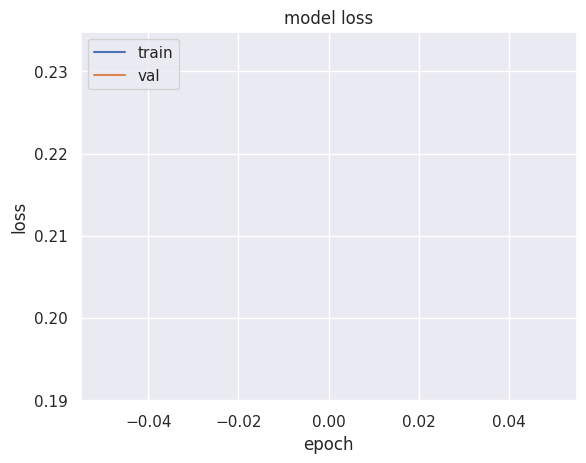

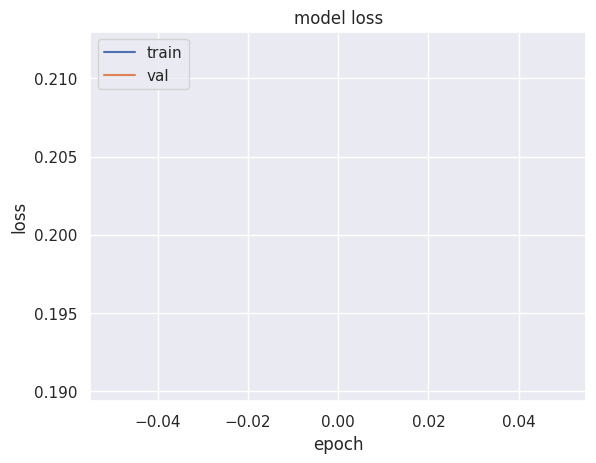

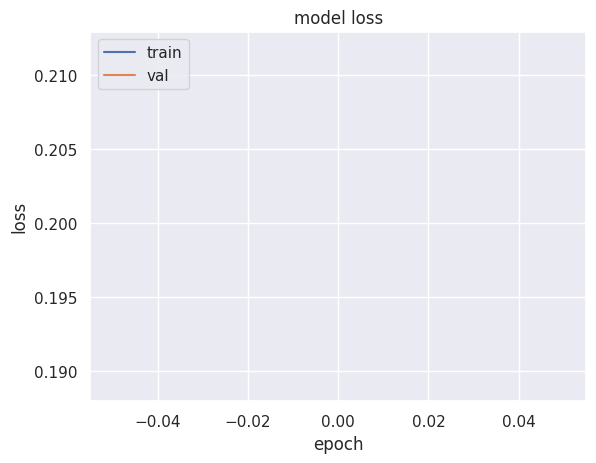

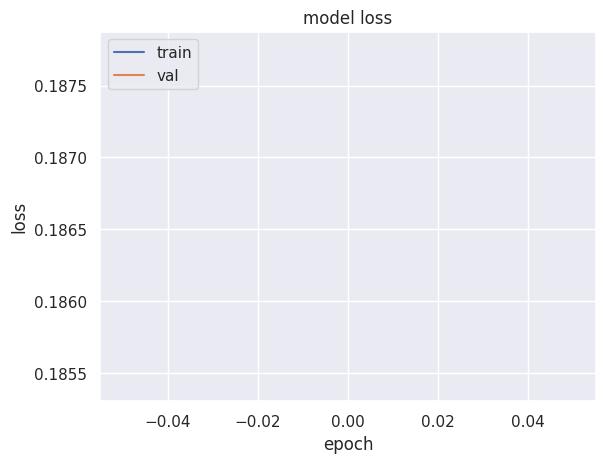

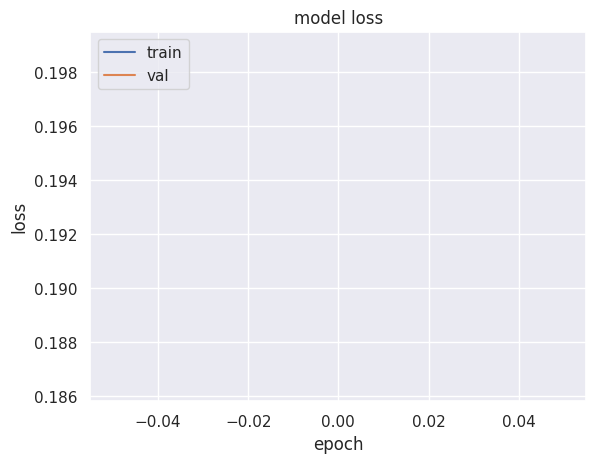

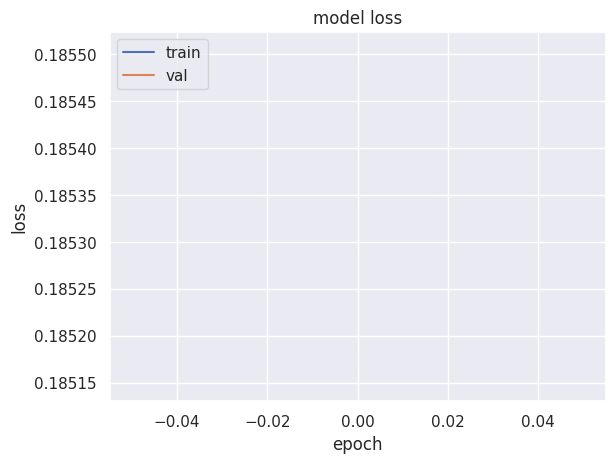

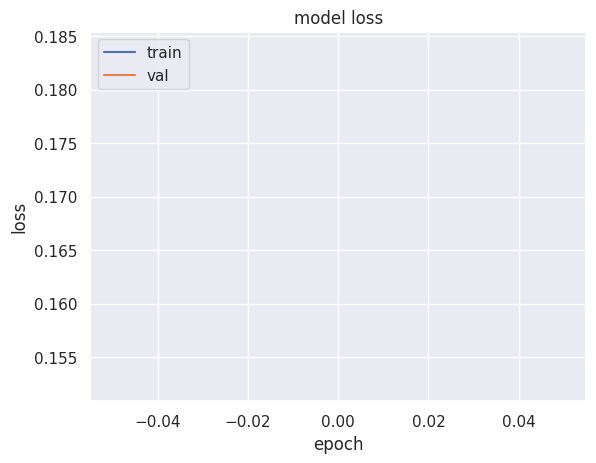

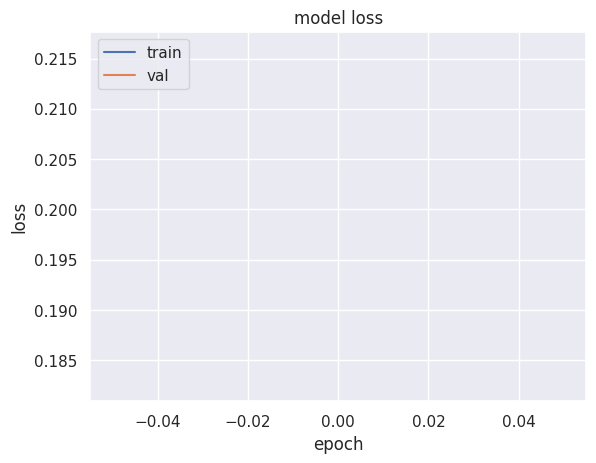

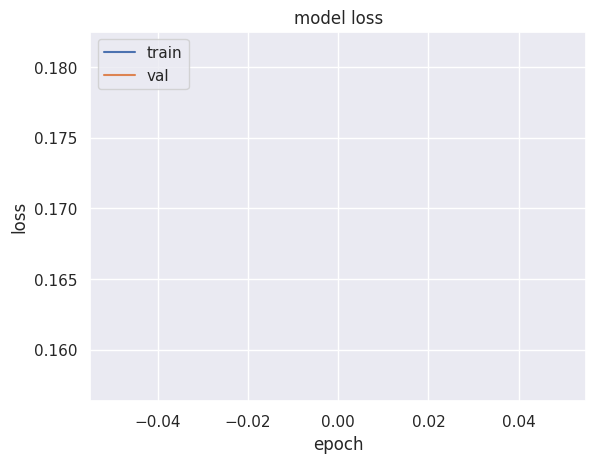

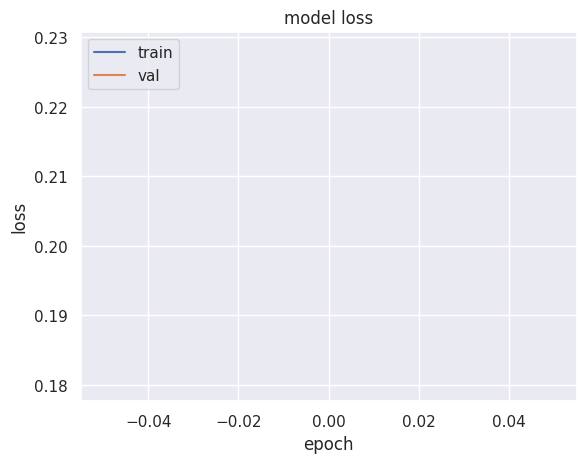

In [ ]:
from matplotlib import pyplot as plt
for history in hists:
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
# X = X.fillna(0)  # Replace NaN with 0 and inf with large finite numbers
y = y.fillna(0)
print(y.describe())

               Joy      Sadness      Disgust         Fear        Anger  \
count  2478.000000  2478.000000  2478.000000  2478.000000  2478.000000   
mean      0.108555     0.116586     0.072639     0.253067     0.183454   
std       0.217464     0.212914     0.169476     0.259679     0.272892   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.200000     0.000000   
75%       0.100000     0.200000     0.000000     0.500000     0.500000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Surprise     Calmness    Confusion      Anxiety         Lust  
count  2478.000000  2478.000000  2478.000000  2478.000000  2478.000000  
mean      0.200646     0.511703     0.117958     0.315093     0.012470  
std       0.259404     0.252641     0.239845     0.260210     0.095445  
min       0.000000     0.000000     0.000

In [ ]:
!nvidia-smi

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import KFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor  # Import XGBoost Regressor

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train_gpu = cp.asarray(X_train)
# y_train_gpu = cp.asarray(y_train)
# X_test_gpu = cp.asarray(X_test)
# y_test_gpu = cp.asarray(y_test)

# get the mean of each feature
mean_values = y_train.mean()
print(mean_values)

# fit_params = {}
# for col in y_test.columns:
#     fit_params[f'eval_set_{col}'] = [(X_train, y_train[col]), (X_test, y_test[col])]
#
# # Fitting model with XGBoost
# xgb_model = MultiOutputRegressor(XGBRegressor(
#     random_state=42,
#     tree_method="exact",
#     max_depth=1,
#     reg_lambda=100,
#     learning_rate=0.01
# ))
#
# '''
# We want to use "exact" because we have a small dataset and we want to emphasize accuracy rather than speed
# We specify a max_depth, introduce L2 regularization, and reduce learning rate from default 0.3 to 0.01 in order to mitigate overfitting
# '''
# for col in y_test.columns:
#     xgb_model.fit(X_train, y_train, eval_set=fit_params[f'eval_set_{col}'], verbose=False) # Verbose=False to suppress output

hyperparameters = {
    'n_estimators': [100],
    'max_depth': [3,6],
    'learning_rate': [0.01],
    'booster': ['dart'],
    'objective': ['reg:squarederror'],
    'tree_method':['hist']
}

eval_set = [(X_train, y_train), (X_test, y_test)]

reg=XGBRegressor()
kf = KFold(n_splits=2, shuffle=True, random_state=42)
search = GridSearchCV(reg, hyperparameters, n_jobs=-1, cv=kf, verbose=4, scoring='neg_mean_squared_error', error_score='raise')

model = MultiOutputRegressor(search)

model.fit(X_train, y_train, verbose=4)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Creating a DataFrame for predictions
predicted_df = pd.DataFrame(y_test_pred, columns=y.columns)

Joy          0.112159
Sadness      0.118012
Disgust      0.070383
Fear         0.250252
Anger        0.180373
Surprise     0.198940
Calmness     0.514127
Confusion    0.117205
Anxiety      0.314581
Lust         0.010999
dtype: float64
Fitting 2 folds for each of 2 candidates, totalling 4 fits


KeyboardInterrupt: 

In [ ]:
for i in range(len(model.estimators_)):
  hps = model.estimators_[i].best_params_
  print(hps)
  print('----------------------------------------------------------------')

{'booster': 'dart', 'device': 'cuda', 'learning_rate': 0.01, 'objective': 'reg:squarederror'}
----------------------------------------------------------------
{'booster': 'gbtree', 'device': 'cuda', 'learning_rate': 0.01, 'objective': 'reg:squarederror'}
----------------------------------------------------------------
{'booster': 'dart', 'device': 'cuda', 'learning_rate': 0.01, 'objective': 'reg:squarederror'}
----------------------------------------------------------------
{'booster': 'gblinear', 'device': 'cuda', 'learning_rate': 0.01, 'objective': 'reg:squarederror'}
----------------------------------------------------------------
{'booster': 'gbtree', 'device': 'cuda', 'learning_rate': 0.01, 'objective': 'reg:squarederror'}
----------------------------------------------------------------
{'booster': 'gblinear', 'device': 'cuda', 'learning_rate': 0.01, 'objective': 'reg:squarederror'}
----------------------------------------------------------------
{'booster': 'dart', 'device': 'cud

In [ ]:
new_sentence = ["Oh I cannot bear to hear his name!"]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

predicted_df.head()

,Joy,Sadness,Disgust,Fear,Anger,Surprise,Calmness,Confusion,Anxiety,Lust
0,0.229858,0.151409,0.426044,0.060915,0.48231,0.035893,0.294128,0.176185,1.489817,0.493362


In [ ]:
print(y_train.columns)

Index(['Joy', 'Sadness', 'Disgust', 'Fear', 'Anger', 'Surprise', 'Calmness',
       'Confusion', 'Anxiety', 'Lust'],
      dtype='object')


In [ ]:
!pip install smogn

r_index: 100%|##########| 578/578 [00:02<00:00, 258.18it/s]
/usr/local/lib/python3.10/dist-packages/smogn/over_sampling.py:439: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      SW_EpisodeIV
1      SW_EpisodeIV
2      SW_EpisodeIV
3      SW_EpisodeIV
4      SW_EpisodeIV
           ...     
573    SW_EpisodeIV
574    SW_EpisodeIV
575    SW_EpisodeIV
576    SW_EpisodeIV
577    SW_EpisodeIV
Name: 1, Length: 578, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_new.iloc[:, j] = data_new.iloc[:, j].replace(x, cat_list[x])
/usr/local/lib/python3.10/dist-packages/smogn/over_sampling.py:439: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      LUKE
1      LUKE
2      LUKE
3      LUKE
4      LUKE
       ... 
573    LUKE
574    LUKE
575    LUKE
576    LUKE
577    LUKE
Name: 2, Length: 578, 

-----------------------------------------------------------------------------------------------


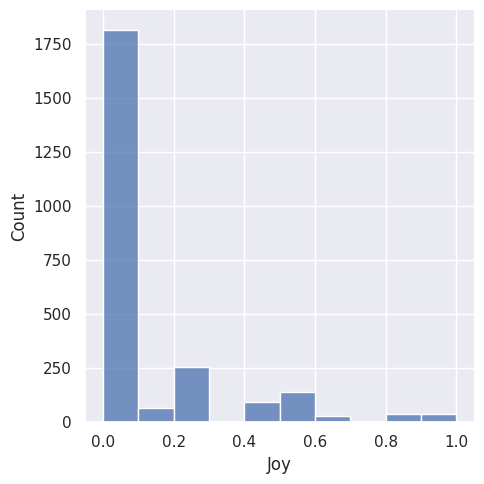

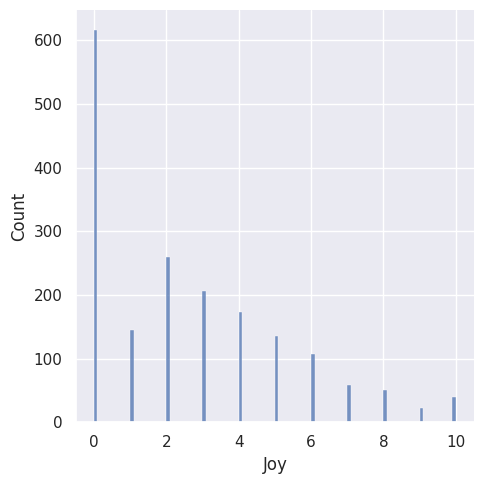

In [ ]:
import seaborn
import smogn


for col in ['Joy']:

  ## conduct smogn
  df_smogn = smogn.smoter(

    ## main arguments
    data = df,           ## pandas dataframe
    y = col,          ## string ('header name')
    # k = 9,                    ## positive integer (k < n)
    # samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    # rel_thres = 0.80,         ## positive real number (0 < R < 1)
    # rel_method = 'auto',      ## string ('auto' or 'manual')
    # rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    # rel_coef = 2.25           ## positive real number (0 < R)
)

  sns.displot(y[col], binwidth=0.1, label=col)
  sns.displot(df_smogn[col], binwidth=0.1, label=col)
  print('-----------------------------------------------------------------------------------------------')


1       0.555556
2       0.222222
3       0.444444
5       0.333333
6       0.111111
          ...   
2342    0.111111
2348    0.000000
2358    0.000000
2450    0.222222
2473    0.000000
Name: Surprise, Length: 900, dtype: float64


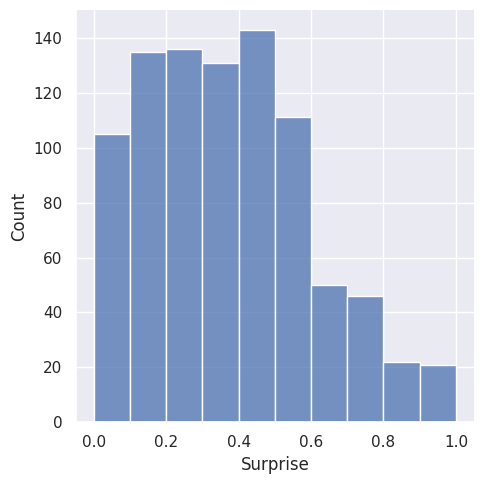

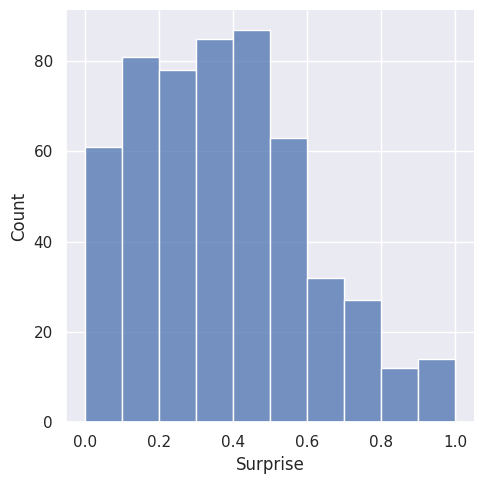

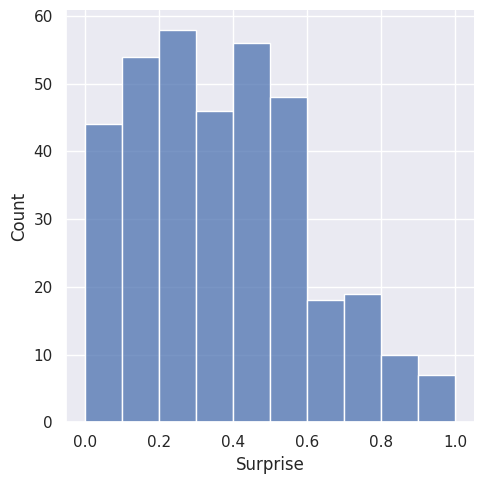

In [ ]:
col = 'Surprise'

df_smogn_new = df_smogn[df_smogn[col] != 0]

X = vectorizer.fit_transform(df_smogn['Dialogue'][1:]).toarray()
y = df_smogn[['Joy', 'Sadness', 'Disgust', 'Fear', 'Anger', 'Surprise', 'Calmness', 'Confusion', 'Anxiety', 'Lust']].iloc[1:]
y = y.apply(pd.to_numeric, errors='coerce').dropna()

y = (y - y.min()) / (y.max() - y.min())

#Remove all rows in y where y['Joy']==0

sns.displot(y[col], binwidth=0.1, label=col)
print(y[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=24)

sns.displot(y_train[col], binwidth=0.1, label=col)
sns.displot(y_test[col], binwidth=0.1, label=col)

[0]	validation_0-rmse:0.25187	validation_1-rmse:0.25319
[1]	validation_0-rmse:0.25170	validation_1-rmse:0.25309
[2]	validation_0-rmse:0.25153	validation_1-rmse:0.25300
[3]	validation_0-rmse:0.25136	validation_1-rmse:0.25291
[4]	validation_0-rmse:0.25119	validation_1-rmse:0.25282
[5]	validation_0-rmse:0.25102	validation_1-rmse:0.25273
[6]	validation_0-rmse:0.25085	validation_1-rmse:0.25265
[7]	validation_0-rmse:0.25069	validation_1-rmse:0.25256
[8]	validation_0-rmse:0.25053	validation_1-rmse:0.25248
[9]	validation_0-rmse:0.25037	validation_1-rmse:0.25241
[10]	validation_0-rmse:0.25021	validation_1-rmse:0.25233
[11]	validation_0-rmse:0.25005	validation_1-rmse:0.25226
[12]	validation_0-rmse:0.24989	validation_1-rmse:0.25218
[13]	validation_0-rmse:0.24974	validation_1-rmse:0.25212
[14]	validation_0-rmse:0.24958	validation_1-rmse:0.25201
[15]	validation_0-rmse:0.24943	validation_1-rmse:0.25194
[16]	validation_0-rmse:0.24928	validation_1-rmse:0.25183
[17]	validation_0-rmse:0.24913	validation

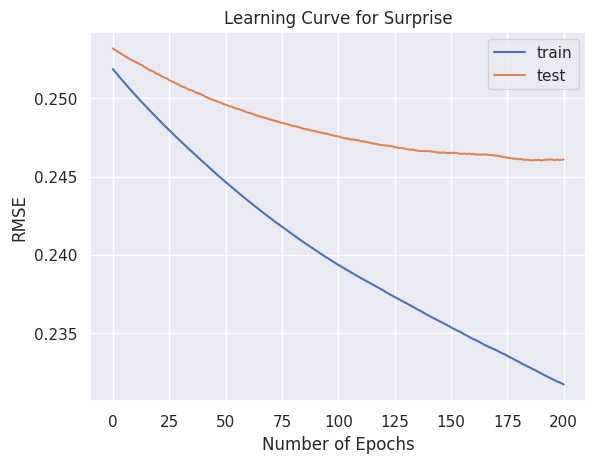

In [ ]:
reg = XGBRegressor(
      random_state=24,
      tree_method="hist",
      learning_rate=0.006,
      max_depth=3,
      n_estimators=5000,
      # subsample=0.6,
      # colsample_bytree=0.6,
      # reg_lambda=0.1,
      # reg_alpha=1,
      # booster='gbtree',
      objective='reg:squarederror',
      eval_metric='rmse',
      early_stopping_rounds=10
)

eval_set = [(X_train, y_train[col]), (X_test, y_test[col])]

reg.fit(X_train, y_train[col], eval_set=eval_set, verbose=True)

results = reg.evals_result()
# # plot learning curves
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
# show the legend
plt.legend()
# show the plot
plt.title(f"Learning Curve for " + col)
#label axes with RMSE
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')
plt.show()

In [ ]:
new_sentence = ["Hello there wonderful friend"]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = reg.predict(new_sentence_tfidf)
print(predicted_emotions)

[0.30516812]


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

col = 'Surprise'
X = vectorizer.fit_transform(df_smogn['Dialogue'][1:]).toarray()
y = df_smogn[['Joy', 'Sadness', 'Disgust', 'Fear', 'Anger', 'Surprise', 'Calmness', 'Confusion', 'Anxiety', 'Lust']].iloc[1:]
y = y.apply(pd.to_numeric, errors='coerce').dropna()

y = (y - y.min()) / (y.max() - y.min())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = linear_model.Lasso(alpha=1)
reg.fit(X_train, y_train[col])

Lasso(alpha=1)

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, verbose=3)
# force scores to be positive
print(scores)
scores = np.abs(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[-0.24057231 -0.23003209 -0.23127046 -0.23791214 -0.22835117 -0.23096599
 -0.22324624 -0.23233438 -0.23893338 -0.22822794 -0.2302108  -0.22271488
 -0.24285046 -0.22955428 -0.22984941 -0.23242686 -0.24036312 -0.21924764
 -0.24063108 -0.23028128 -0.2299439  -0.23613788 -0.23169351 -0.23422047
 -0.2296364  -0.21873008 -0.23128287 -0.22970992 -0.23343566 -0.24398399]
Mean MAE: 0.232 (0.006)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.8s finished


[0.26838843 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843
 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843
 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843
 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843
 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843
 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843
 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843
 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843
 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843
 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843
 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843
 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843
 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843
 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843
 0.26838843 0.26838843 0.26838843 0.26838843 0.26838843 0.2683

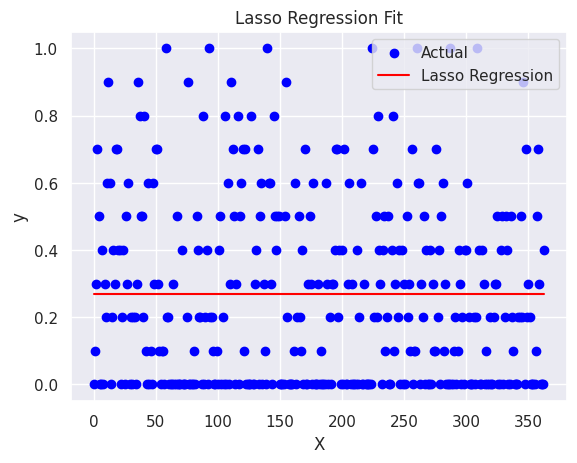

In [ ]:
y_pred = reg.predict(X_test)

test_axis = np.arange(len(y_pred))

print(y_pred)
# Plot the data points
plt.scatter(test_axis, y_test[col], color='blue', label='Actual')

# Plot the regression line
plt.plot(test_axis, y_pred, color='red', label='Lasso Regression')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso Regression Fit')
plt.legend()
plt.show()

In [ ]:
print(df_smogn['Joy'])

0       8.0
1       5.0
2       3.0
3       6.0
4       4.0
       ... 
2468    0.0
2472    0.0
2473    3.0
2474    0.0
2477    0.0
Name: Joy, Length: 1817, dtype: float64


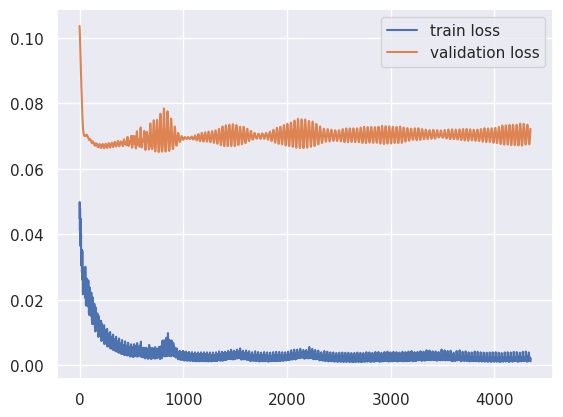

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Simulate train / test / validation sets
X_train, X_hold, y_train, y_hold = train_test_split(X, y, train_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, train_size=0.5)

reg = MLPRegressor()
batch_size, train_loss_, valid_loss_ = 50, [], []

for _ in range(150):
    for b in range(batch_size, len(y_train), batch_size):
        X_batch, y_batch = X_train[b-batch_size:b], y_train[b-batch_size:b]
        reg.partial_fit(X_batch, y_batch)
        train_loss_.append(reg.loss_)
        valid_loss_.append(mean_squared_error(y_valid, reg.predict(X_valid) / 2))

plt.plot(range(len(train_loss_)), train_loss_, label="train loss")
plt.plot(range(len(train_loss_)), valid_loss_, label="validation loss")
plt.legend()

Iteration 1, loss = 0.03378926
Validation score: -0.481689
Iteration 2, loss = 0.02347054
Validation score: -0.235553
Iteration 3, loss = 0.01273460
Validation score: -0.150817
Iteration 4, loss = 0.01075496
Validation score: -0.089658
Iteration 5, loss = 0.00664975
Validation score: -0.214944
Iteration 6, loss = 0.00567403
Validation score: -0.263188
Iteration 7, loss = 0.00453411
Validation score: -0.196721
Iteration 8, loss = 0.00424175
Validation score: -0.217645
Iteration 9, loss = 0.00351968
Validation score: -0.298213
Iteration 10, loss = 0.00323751
Validation score: -0.339257
Iteration 11, loss = 0.00304427
Validation score: -0.324510
Iteration 12, loss = 0.00282512
Validation score: -0.349898
Iteration 13, loss = 0.00264804
Validation score: -0.413862
Iteration 14, loss = 0.00253797
Validation score: -0.428717
Iteration 15, loss = 0.00244722
Validation score: -0.447971
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


<Axes: >

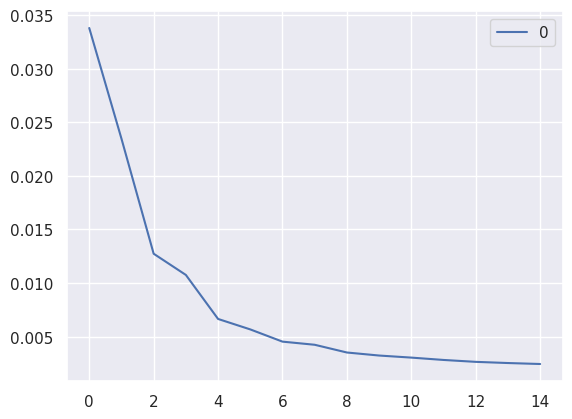

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=27)

regr = MLPRegressor(
    learning_rate_init=0.01,
    activation='identity',
    max_iter=2000,
    solver='adam',
    early_stopping=True,
    validation_fraction=0.2,
    verbose=1
)
regr.fit(X_train, y_train['Joy'])
pd.DataFrame(regr.loss_curve_).plot()

In [ ]:
def predict(ins):
  outs = []
  for i in range(len(regs)):
    outs.append(regs[i].predict(input))
  return outs

In [ ]:
# model evaluation
# Perform k-fold cross-validation (e.g., 5-fold)
from sklearn.model_selection import cross_val_score

# k = 5
# mse_scores = cross_val_score(xgb_model, X, y, cv=k, scoring='neg_mean_squared_error')
# mse_scores = -mse_scores
# print(f"MSE scores for each fold: {mse_scores}")
# print(f"Mean MSE: {np.mean(mse_scores)}")
# print(f"Standard Deviation of MSE: {np.std(mse_scores)}")

# show the training mse
train_mse = mean_squared_error(y_train, y_train_pred, multioutput='raw_values')
train_mse_results = dict(zip(y.columns, train_mse))

# show the testing mse
test_mse = mean_squared_error(y_test, y_test_pred, multioutput='raw_values')
test_mse_results = dict(zip(y.columns, test_mse))

eval_df = pd.DataFrame({'Training MSE': train_mse_results, 'Testing MSE': test_mse_results}, index=y.columns)
eval_df['Which is Greater'] = eval_df.apply(lambda row: row.idxmax(), axis=1)
display(eval_df)

,Training MSE,Testing MSE,Which is Greater
Joy,0.066555,0.063680,Training MSE
Sadness,0.046335,0.040850,Training MSE
Disgust,0.037096,0.031474,Training MSE
Fear,0.065653,0.080537,Testing MSE
Anger,0.062170,0.092323,Testing MSE
Surprise,0.108006,0.105062,Training MSE
Calmness,0.128690,0.140492,Testing MSE
Confusion,0.100420,0.124657,Testing MSE
Anxiety,0.098709,0.116565,Testing MSE
Lust,0.022565,0.024071,Testing MSE


	Training MSE	Testing MSE	Which is Greater
Joy	0.077016	0.065213	Training MSE
Sadness	0.045293	0.040930	Training MSE
Disgust	0.036802	0.031384	Training MSE
Fear	0.075107	0.079368	Testing MSE
Anger	0.063965	0.091993	Testing MSE
Surprise	0.105827	0.104578	Training MSE
Calmness	0.132447	0.140911	Testing MSE
Confusion	0.103742	0.125726	Testing MSE
Anxiety	0.114770	0.114549	Training MSE
Lust	0.023617	0.023632	Testing MSE


before thresholding:

after thresholding:

Emotion with Highest Value:
0    Surprise
dtype: object


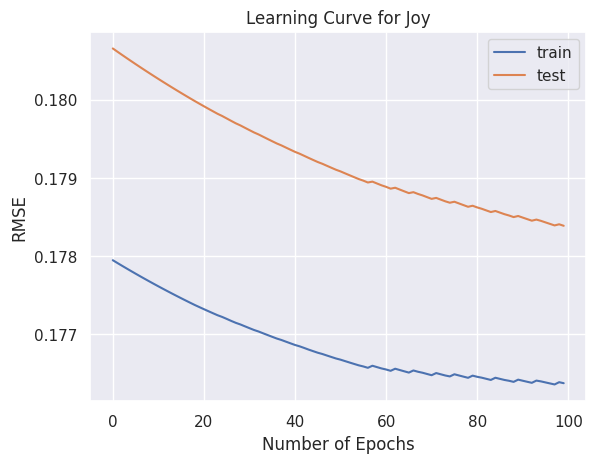

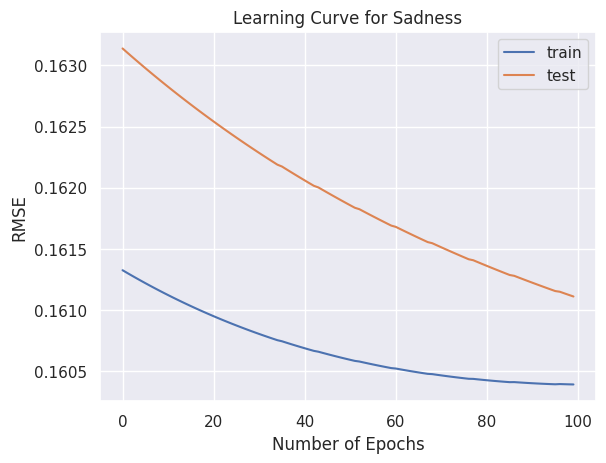

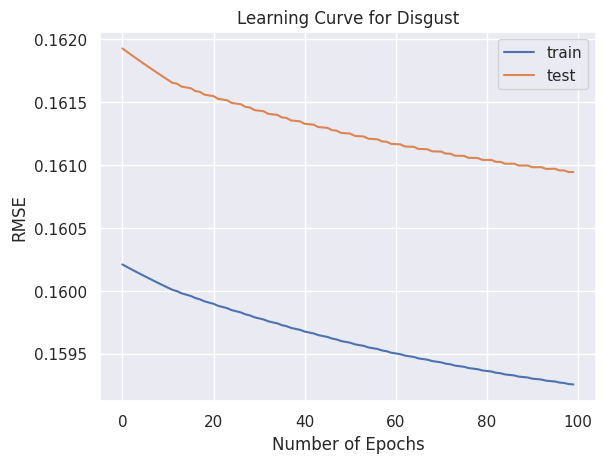

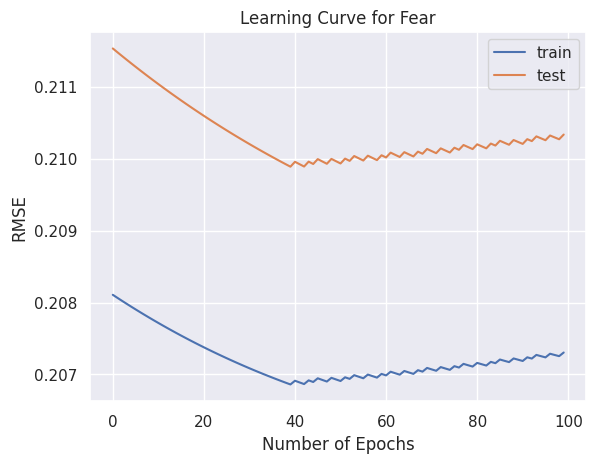

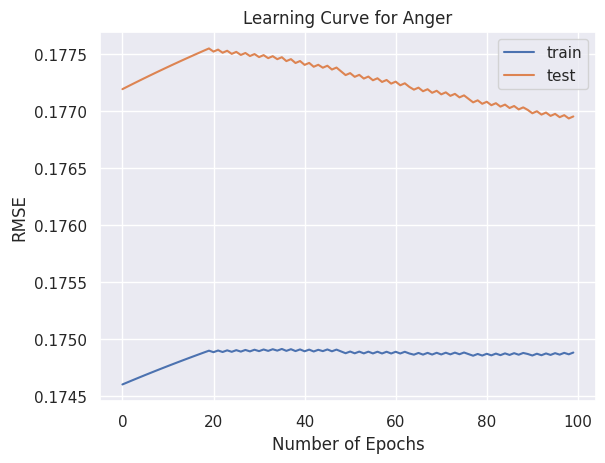

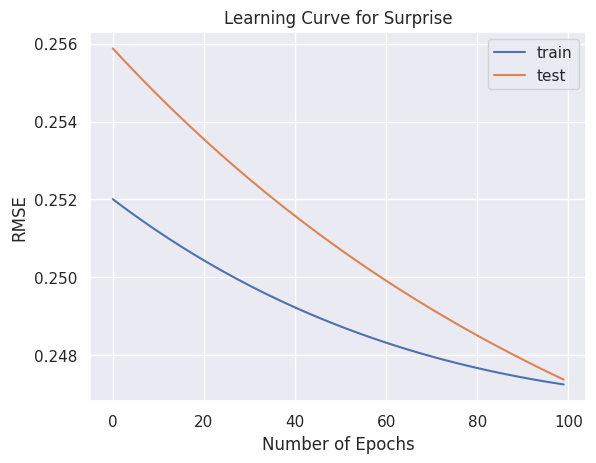

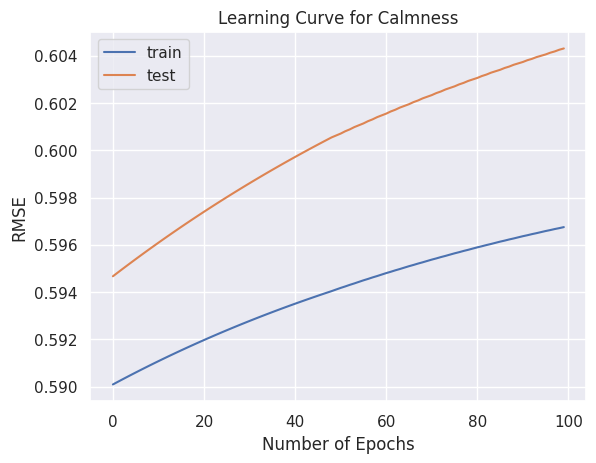

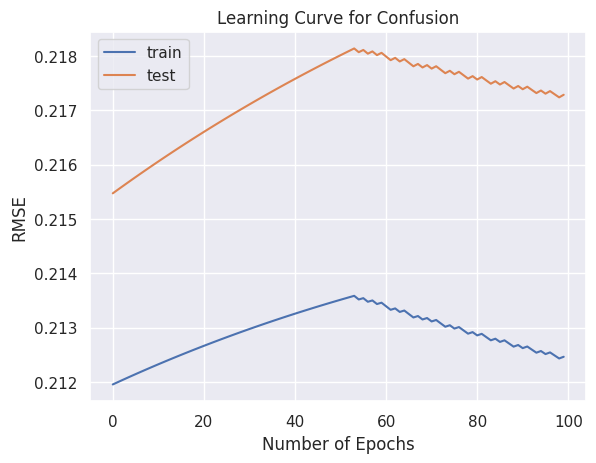

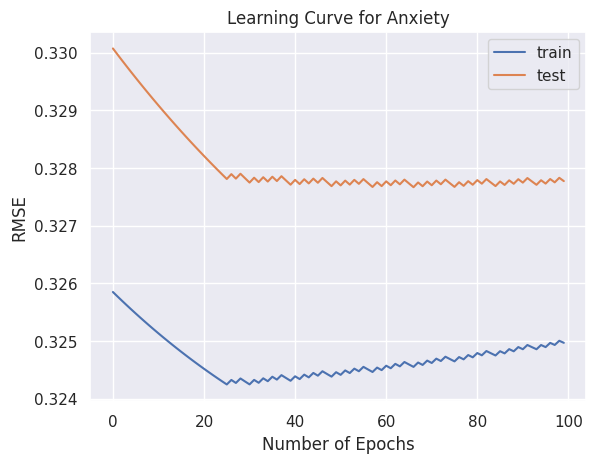

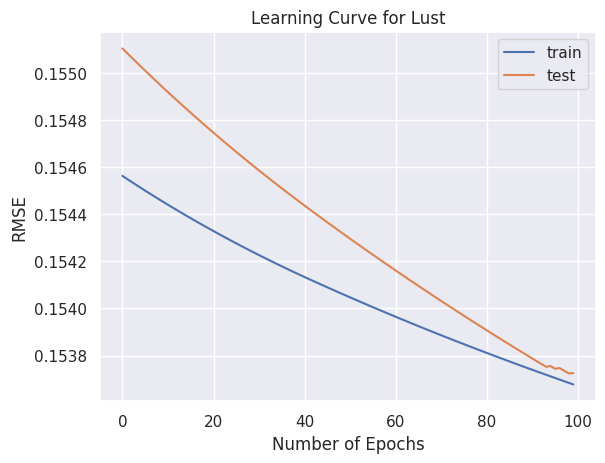

In [ ]:
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve

new_sentence = ["Oh I cannot bear to hear his name!"]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = xgb_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

print("before thresholding:")
#display(predicted_df)
print()

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values
# if the value is <0, just set it equal to 0
predicted_df[predicted_df < 0] = 0

print("after thresholding:")
#display(predicted_df)
print()

# print the emotion with the highest values in predicted_df
print("Emotion with Highest Value:")
print(predicted_df.idxmax(axis=1))

for i in range(len(y_test.columns)):
  results = xgb_model.estimators_[i].evals_result()
  # # plot learning curves
  plt.plot(results['validation_0']['rmse'], label='train')
  plt.plot(results['validation_1']['rmse'], label='test')
  # show the legend
  plt.legend()
  # show the plot
  plt.title(f"Learning Curve for {y_test.columns[i]}")
  #label axes with RMSE
  plt.xlabel('Number of Epochs')
  plt.ylabel('RMSE')
  plt.show()

In [ ]:
'''
We have 10 emotions, but this process for finding predictions of correct and FP and FN from the test dataset
is the same for each emotion. In this case, we will be using the "Surprise" emotion.
'''

# Here is an example of a correct prediction of surprise. This line is rated 20 for surprise.
'''
30,SW_EpisodeVI,THREEPIO,"Oh, my! Die Wanna Wauaga. We -- we bring a message to your master, Jabba the Hutt.",0,0,2,5,0,10,0,0,7,0
'''

new_sentence = ["Oh, my! Die Wanna Wauaga. We -- we bring a message to your master, Jabba the Hutt."]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = xgb_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values
# if the value is <0, just set it equal to 0
predicted_df[predicted_df < 0] = 0

# print the emotion with the highest values in predicted_df
print("Emotion with Highest Value:")
print(predicted_df.idxmax(axis=1))

Emotion with Highest Value:
0    Surprise
dtype: object


In [ ]:
# Here is an example of a False Negative prediction of surprise. This is the line. It is rated 10 for surprise.:
'''
41,SW_EpisodeVI,THREEPIO,What did he say?,0,0,0,10,0,10,0,10,10,0
'''

new_sentence = ["What did he say?"]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = xgb_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values
# if the value is <0, just set it equal to 0
predicted_df[predicted_df < 0] = 0

# print the emotion with the highest values in predicted_df
print("Emotion with Highest Value:")
print(predicted_df.idxmax(axis=1))

Emotion with Highest Value:
0    Calmness
dtype: object


In [ ]:
# Here is an example of a False Positive prediction of surprise. This is the line. It is rated 0 for surprise.:
'''
52,SW_EpisodeVI,THREEPIO,"Oh. Well, yes.",10,0,0,0,0,4,0,3,4,0
'''

new_sentence = ["Oh. Well, yes."]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = xgb_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values
# if the value is <0, just set it equal to 0
predicted_df[predicted_df < 0] = 0

# print the emotion with the highest values in predicted_df
print("Emotion with Highest Value:")
print(predicted_df.idxmax(axis=1))

Emotion with Highest Value:
0    Surprise
dtype: object
